## Relational plots

### seaborn.scatterplot¶
seaborn.scatterplot(x=None, y=None, hue=None, style=None, size=None, data=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, markers=True, style_order=None, x_bins=None, y_bins=None, units=None, estimator=None, ci=95, n_boot=1000, alpha='auto', x_jitter=None, y_jitter=None, legend='brief', ax=None, **kwargs)
Draw a scatter plot with possibility of several semantic groupings.

The relationship between x and y can be shown for different subsets of the data using the hue, size, and style parameters. These parameters control what visual semantics are used to identify the different subsets. It is possible to show up to three dimensions independently by using all three semantic types, but this style of plot can be hard to interpret and is often ineffective. Using redundant semantics (i.e. both hue and style for the same variable) can be helpful for making graphics more accessible.

See the tutorial for more information.

The default treatment of the hue (and to a lesser extent, size) semantic, if present, depends on whether the variable is inferred to represent “numeric” or “categorical” data. In particular, numeric variables are represented with a sequential colormap by default, and the legend entries show regular “ticks” with values that may or may not exist in the data. This behavior can be controlled through various parameters, as described and illustrated below.

#### Parameters
x, ynames of variables in data or vector data, optional
Input data variables; must be numeric. Can pass data directly or reference columns in data.

huename of variables in data or vector data, optional
Grouping variable that will produce points with different colors. Can be either categorical or numeric, although color mapping will behave differently in latter case.

sizename of variables in data or vector data, optional
Grouping variable that will produce points with different sizes. Can be either categorical or numeric, although size mapping will behave differently in latter case.

stylename of variables in data or vector data, optional
Grouping variable that will produce points with different markers. Can have a numeric dtype but will always be treated as categorical.

dataDataFrame
Tidy (“long-form”) dataframe where each column is a variable and each row is an observation.

palettepalette name, list, or dict, optional
Colors to use for the different levels of the hue variable. Should be something that can be interpreted by color_palette(), or a dictionary mapping hue levels to matplotlib colors.

hue_orderlist, optional
Specified order for the appearance of the hue variable levels, otherwise they are determined from the data. Not relevant when the hue variable is numeric.

hue_normtuple or Normalize object, optional
Normalization in data units for colormap applied to the hue variable when it is numeric. Not relevant if it is categorical.

sizeslist, dict, or tuple, optional
An object that determines how sizes are chosen when size is used. It can always be a list of size values or a dict mapping levels of the size variable to sizes. When size is numeric, it can also be a tuple specifying the minimum and maximum size to use such that other values are normalized within this range.

size_orderlist, optional
Specified order for appearance of the size variable levels, otherwise they are determined from the data. Not relevant when the size variable is numeric.

size_normtuple or Normalize object, optional
Normalization in data units for scaling plot objects when the size variable is numeric.

markersboolean, list, or dictionary, optional
Object determining how to draw the markers for different levels of the style variable. Setting to True will use default markers, or you can pass a list of markers or a dictionary mapping levels of the style variable to markers. Setting to False will draw marker-less lines. Markers are specified as in matplotlib.

style_orderlist, optional
Specified order for appearance of the style variable levels otherwise they are determined from the data. Not relevant when the style variable is numeric.

{x,y}_binslists or arrays or functions
Currently non-functional.

units{long_form_var}
Grouping variable identifying sampling units. When used, a separate line will be drawn for each unit with appropriate semantics, but no legend entry will be added. Useful for showing distribution of experimental replicates when exact identities are not needed.

Currently non-functional.

estimatorname of pandas method or callable or None, optional
Method for aggregating across multiple observations of the y variable at the same x level. If None, all observations will be drawn. Currently non-functional.

ciint or “sd” or None, optional
Size of the confidence interval to draw when aggregating with an estimator. “sd” means to draw the standard deviation of the data. Setting to None will skip bootstrapping. Currently non-functional.

n_bootint, optional
Number of bootstraps to use for computing the confidence interval. Currently non-functional.

alphafloat
Proportional opacity of the points.

{x,y}_jitterbooleans or floats
Currently non-functional.

legend“brief”, “full”, or False, optional
How to draw the legend. If “brief”, numeric hue and size variables will be represented with a sample of evenly spaced values. If “full”, every group will get an entry in the legend. If False, no legend data is added and no legend is drawn.

axmatplotlib Axes, optional
Axes object to draw the plot onto, otherwise uses the current Axes.

kwargskey, value mappings
Other keyword arguments are passed down to matplotlib.axes.Axes.scatter().

Returns
axmatplotlib Axes
Returns the Axes object with the plot drawn onto it.

#### Examples

Draw a simple scatter plot between two variable

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


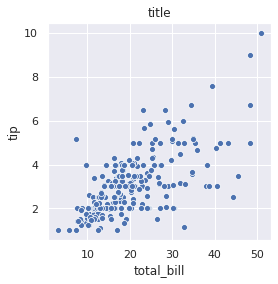

In [2]:
fig, ax = plt.subplots(figsize=(4,4))
sns.scatterplot(x='total_bill', y= 'tip',data=tips)
ax.set_title('title')
plt.show()

Group by another variable and show the groups with different colors:

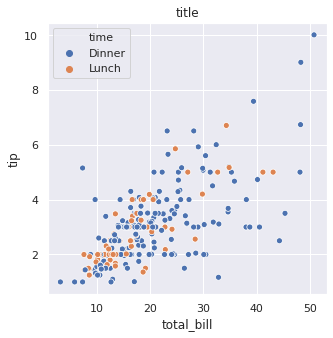

In [3]:
fig, ax = plt.subplots(figsize=(5,5))
sns.scatterplot(x='total_bill', y='tip', hue='time', data=tips)
ax.set_title('title')
plt.show()

Show the grouping variable by varying both color and marker:

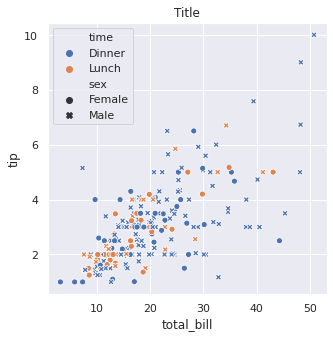

In [4]:
fig, ax = plt.subplots(figsize=(5,5))
sns.scatterplot(x='total_bill', y='tip', hue='time', style='sex', data= tips)
ax.set_title('Title')
plt.show()

Show a quantitative variable by varying the size of the points:

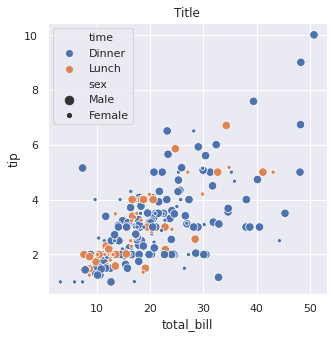

In [5]:
fig, ax = plt.subplots(figsize=(5,5))
sns.scatterplot(x='total_bill', y= 'tip', size='sex',hue='time', data=tips)
ax.set_title('Title')
plt.show()

Also show the quantitative variable by also using continuous colors:

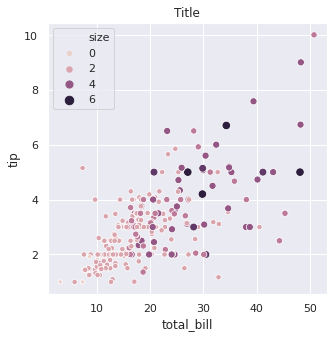

In [6]:
fig, ax = plt.subplots(figsize=(5,5))
sns.scatterplot(x='total_bill', y='tip', hue='size', size='size', data=tips)
ax.set_title('Title')
plt.show()

Use a different continuous color map:

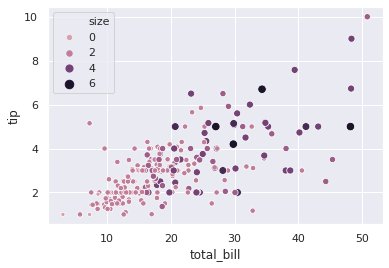

In [14]:
cmap = sns.cubehelix_palette(dark=0.1, light=0.7, as_cmap=True)
sns.scatterplot(x='total_bill', y='tip', size='size', hue='size', palette=cmap, data=tips)
plt.show()

Change the minimum and maximum point size and show all sizes in legend:

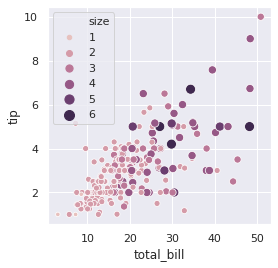

In [21]:
cmap = sns.cubehelix_palette(dark=0.2, light=0.8, as_cmap=True)
fig, ax = plt.subplots(figsize=(4,4))
ax = sns.scatterplot(x='total_bill', y='tip',hue='size', size='size', palette=cmap, data=tips, sizes=(20,100), legend='full')
plt.show()

Use a narrower range of color map intensities:

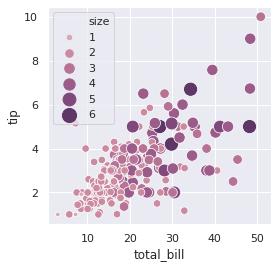

In [31]:
cmpa = sns.cubehelix_palette(dark=0.1, light=0.8,as_cmap=True)
fig, ax = plt.subplots(figsize=(4,4))
ax = sns.scatterplot(x='total_bill', y='tip', hue='size', size='size',
                     sizes=(20,200), legend='full', hue_norm=(0,7), palette=cmap, data=tips)
plt.show()

Vary the size with a categorical variable, and use a different palette:

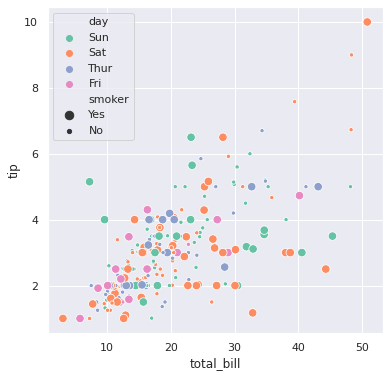

In [37]:
cmap = sns.cubehelix_palette(dark=0.1, light=0.8, as_cmap=True)
fig, ax = plt.subplots(figsize=(6,6))
ax = sns.scatterplot(x= 'total_bill', y='tip', hue='day', size='smoker', palette='Set2',legend='full', data=tips)
plt.show()

Use a specific set of markers:

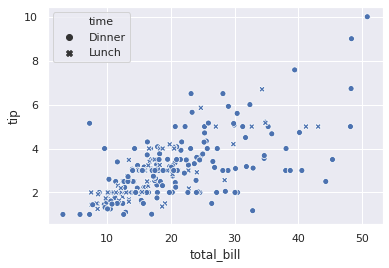

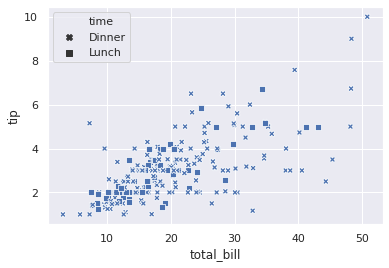

In [42]:
# With and without markers

sns.scatterplot(x='total_bill', y='tip', style='time', data=tips)
plt.show()

marker = {'Lunch':'s', 'Dinner':'X'}
sns.scatterplot(x='total_bill', y='tip', style='time', data=tips, markers=marker)
plt.show()

Control plot attributes using matplotlib parameters:



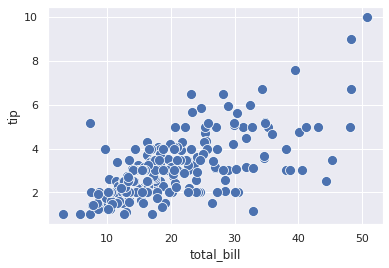

In [45]:
sns.scatterplot(x='total_bill', y='tip', data=tips, markers='+', s=100)
plt.show()


Pass data vectors instead of names in a data frame

In [47]:
iris = sns.load_dataset('iris')

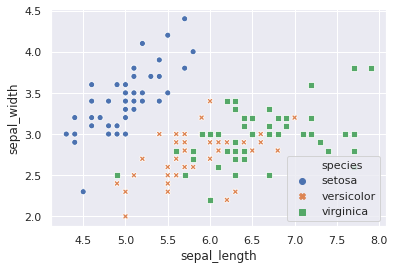

In [48]:
sns.scatterplot(x=iris.sepal_length, y=iris.sepal_width, hue=iris.species, style=iris.species)
plt.show()